In [3]:
pip install yfinance

In [4]:
pip install seaborn

In [7]:
pip install matplotlib

In [8]:
pip install pandas

In [9]:
pip install numpy

In [10]:
pip install cufflinks

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 17.0 MB/s eta 0:00:00


In [11]:
pip install statsmodels

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.style as style
import seaborn as sns
import yfinance as yf

style.use("default")

params = {
    "axes.labelsize": 8, "font.size": 8, "legend.fontsize": 8,
    "xtick.labelsize": 8, "ytick.labelsize": 8, "text.usetex": False,
    "font.family": "sans-serif", "axes.spines.top": False, "axes.spines.right": False,
    "grid.color": "grey", "axes.grid": True,  "grid.alpha": 0.5, "grid.linestyle": ":",
}

plt.rcParams.update(params)

[*********************100%***********************]  1 of 1 completed


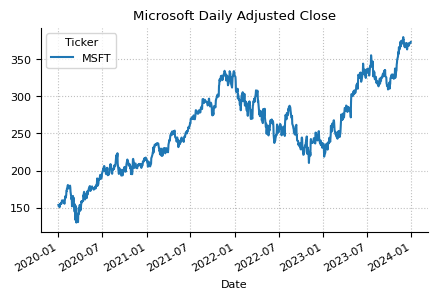

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.style as style
import seaborn as sns
import yfinance as yf

style.use("default")

params = {
    "axes.labelsize": 8, "font.size": 8, "legend.fontsize": 8,
    "xtick.labelsize": 8, "ytick.labelsize": 8, "text.usetex": False,
    "font.family": "sans-serif", "axes.spines.top": False, "axes.spines.right": False,
    "grid.color": "grey", "axes.grid": True,  "grid.alpha": 0.5, "grid.linestyle": ":",
}

plt.rcParams.update(params)
# use Yahoo Finance to download historical data for MSFT
# over the last 15 years, from 2020-01-01 to 2023-31-01
msft_daily = yf.download("MSFT", start="2020-01-01", end="2023-12-31")
msft_daily["Adj Close"].plot(title="Microsoft Daily Adjusted Close", figsize=(5, 3))
plt.show()

[*********************100%***********************]  1 of 1 completed


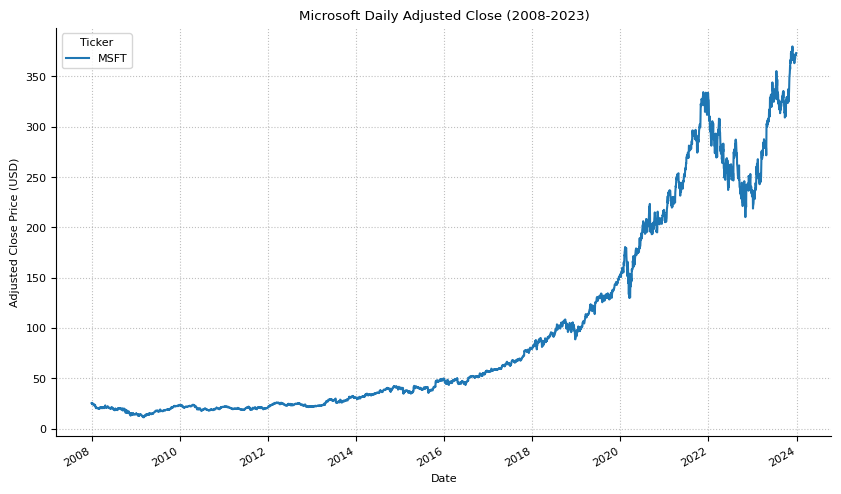

In [22]:
# Set plotting style and parameters
plt.style.use("default")
params = {
    "axes.labelsize": 8, "font.size": 8, "legend.fontsize": 8,
    "xtick.labelsize": 8, "ytick.labelsize": 8, "text.usetex": False,
    "font.family": "sans-serif", "axes.spines.top": False, "axes.spines.right": False,
    "grid.color": "grey", "axes.grid": True,  "grid.alpha": 0.5, "grid.linestyle": ":",
}
plt.rcParams.update(params)

# Download historical data for MSFT (Microsoft) using Yahoo Finance
# Adjusted date range to the comment if 15 years is the intention
msft_daily = yf.download("MSFT", start="2008-01-01", end="2023-12-31")

# Plot Adjusted Close Prices
msft_daily["Adj Close"].plot(title="Microsoft Daily Adjusted Close (2008-2023)", figsize=(10, 6))
plt.xlabel("Date")
plt.ylabel("Adjusted Close Price (USD)")
plt.show()

In [25]:
# Resample data to monthly frequency, forward-fill missing values, and calculate monthly returns
msft_monthly = msft_daily[["Adj Close"]].resample("ME").ffill()

# Convert index to period (monthly)
msft_monthly.index = msft_monthly.index.to_period("M")

# Calculate percentage change for monthly returns
msft_monthly["Return"] = msft_monthly["Adj Close"].pct_change() * 100

# Drop rows with missing values (NaN)
msft_monthly.dropna(inplace=True)

# Display the resulting DataFrame
msft_monthly

<ipython-input-25-f919d421c66a>:5: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  msft_monthly.index = msft_monthly.index.to_period("M")


Price,Adj Close,Return
Ticker,MSFT,
Date,,
2008-02,19.722076,-16.240238
2008-03,20.577658,4.338191
2008-04,20.679178,0.493353
2008-05,20.609753,-0.335727
2008-06,20.020281,-2.860160
...,...,...
2023-08,324.668304,-2.222561
2023-09,312.771545,-3.664281


In [49]:
# Load the CSV file and skip metadata rows at the top (e.g., use skiprows)
ff_factors_monthly = pd.read_csv(
    "/content/F-F_Research_Data_Factors.CSV",
    skiprows=3,  # Adjust this number to skip rows with metadata
    index_col=0,
    sep=',',  # Replace with the correct delimiter: ',' for commas, '\t' for tabs, etc.
)

# Rename the index column to "Date"
ff_factors_monthly.index.names = ["Date"]

# Convert the index to datetime format, assuming valid date strings
ff_factors_monthly.index = pd.to_datetime(ff_factors_monthly.index, format="%Y%m", errors='coerce')

# Drop rows with invalid dates in the index
ff_factors_monthly.dropna(inplace=True)

# Convert index to monthly periods
ff_factors_monthly.index = ff_factors_monthly.index.to_period("M")

# Display the DataFrame
ff_factors_monthly

# Filter Fama-French data to start from Microsoft's IPO in March 1986
ff_factors_monthly = ff_factors_monthly.loc["2008-02":"2023-12"]

# Display the filtered dataset
ff_factors_monthly

,Mkt-RF,SMB,HML,RF
Date,,,,
2008-02,-3.09,-0.43,-0.84,0.13
2008-03,-0.93,0.71,0.30,0.17
2008-04,4.60,-1.72,-0.94,0.18
2008-05,1.86,2.96,-1.43,0.18
2008-06,-8.44,1.23,-2.71,0.17
...,...,...,...,...
2023-08,-2.39,-3.20,-1.08,0.45
2023-09,-5.24,-2.49,1.45,0.43
2023-10,-3.18,-3.88,0.19,0.47


In [60]:
# Display the filtered dataset
ff_factors_monthly

,Mkt-RF,SMB,HML,RF
Date,,,,
2008-02,-3.09,-0.43,-0.84,0.13
2008-03,-0.93,0.71,0.30,0.17
2008-04,4.60,-1.72,-0.94,0.18
2008-05,1.86,2.96,-1.43,0.18
2008-06,-8.44,1.23,-2.71,0.17
...,...,...,...,...
2023-08,-2.39,-3.20,-1.08,0.45
2023-09,-5.24,-2.49,1.45,0.43
2023-10,-3.18,-3.88,0.19,0.47


No charts were generated by quickchart


In [67]:
# Filter factor dates to match the asset
ff_factors_subset = ff_factors_monthly[
    ff_factors_monthly.index.isin(msft_monthly.index)
].copy()

# Step 3: Calculate excess returns
# Convert 'RF' column to numeric before subtraction
ff_factors_subset["RF"] = pd.to_numeric(ff_factors_subset["RF"], errors='coerce')
ff_factors_subset["Excess_Return"] = msft_monthly["Return"] - ff_factors_subset["RF"]

# Display the DataFrame with Excess_Return as the last column
ff_factors_subset = ff_factors_subset[
    ["Mkt-RF", "SMB", "HML", "RF", "Excess_Return"]
]  # Reorder columns
ff_factors_subset

,Mkt-RF,SMB,HML,RF,Excess_Return
Date,,,,,
2008-02,-3.09,-0.43,-0.84,0.13,-16.370238
2008-03,-0.93,0.71,0.30,0.17,4.168191
2008-04,4.60,-1.72,-0.94,0.18,0.313353
2008-05,1.86,2.96,-1.43,0.18,-0.515727
2008-06,-8.44,1.23,-2.71,0.17,-3.030160
...,...,...,...,...,...
2023-08,-2.39,-3.20,-1.08,0.45,-2.672561
2023-09,-5.24,-2.49,1.45,0.43,-4.094281
2023-10,-3.18,-3.88,0.19,0.47,6.611561


In [69]:
import statsmodels.api as sm
import pandas as pd

# ... (your existing code for loading and preprocessing data) ...

# Ensure all relevant columns in ff_factors_subset are numeric
numeric_cols = ["Mkt-RF", "SMB", "HML", "RF", "Excess_Return"]
ff_factors_subset[numeric_cols] = ff_factors_subset[numeric_cols].apply(pd.to_numeric, errors='coerce')

# Drop rows with any missing values after conversion
ff_factors_subset.dropna(inplace=True)

# Prepare the independent variables (add a constant to the model)
X = sm.add_constant(ff_factors_subset[["Mkt-RF", "SMB", "HML"]])
# The dependent variable
y = ff_factors_subset["Excess_Return"]
# Run the regression
model = sm.OLS(y, X).fit()
# Display the summary of the regression
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:          Excess_Return   R-squared:                       0.512
Model:                            OLS   Adj. R-squared:                  0.505
Method:                 Least Squares   F-statistic:                     65.51
Date:                Thu, 28 Nov 2024   Prob (F-statistic):           5.35e-29
Time:                        07:43:39   Log-Likelihood:                -561.73
No. Observations:                 191   AIC:                             1131.
Df Residuals:                     187   BIC:                             1144.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.7018      0.341      2.056      0.0